In [1]:
#!pip install Libraries
#!pip install matplotlib
#!pip install nltk
#!pip install seaborn
#!pip install stopwords
#!pip install wordcloud -----Showing error in command prompt!
#!pip install sklearn
#!pip install xgboost
#!pip install streamlit

In [2]:
import numpy as np
import pandas as pd

In [3]:
## UnicodeDecodeError

df=pd.read_csv('C:\\Users\\JAINARAYAN SINGH\\spam.csv')

In [4]:
## To get that we are in which directory

import os           
os.getcwd()

'C:\\Users\\JAINARAYAN SINGH\\ML Projects'

In [5]:
## 1-Solution of UnicodeDecodeError



In [6]:
# df = pd.read_csv(file,encoding='ISO-8859-1')
# df.sample(5)

In [7]:
## 2- Solution UnicodeDecodeError by saving csv file as CSV(UTF-8)

import pandas as pd
file = 'C:\\Users\\JAINARAYAN SINGH\\spam.csv'        
df = pd.read_csv(file)
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3550,ham,I love you both too :-),NaN,NaN,NaN
693,ham,Will purchase d stuff today and mail to you. D...,NaN,NaN,NaN
121,ham,here is my new address -apples&pairs&all that ...,NaN,NaN,NaN
3957,ham,So i could kiss and feel you next to me...,NaN,NaN,NaN
2569,ham,Ultimately tor motive tui achieve korli.,NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
# Data Cleaning
# EDA
# Text preprocessing
# Model Building
# Evaluation
# Improvments depending upon the results
# Website making
# Deploy on Herouku

## 1. Data Cleaning

In [10]:
# I will see wheather their is a use of last 3 column or not or can we remove it

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3' ,'Unnamed: 4'],inplace=True)

In [12]:
df.sample(5)

,v1,v2
892,ham,Nutter. Cutter. Ctter. Cttergg. Cttargg. Ctarg...
1378,ham,"Ya tel, wats ur problem.."
2671,ham,"That's cool, I'll come by like &lt;#&gt; ish"
2910,ham,"Sorry,in meeting I'll call later"
5424,ham,U horrible gal... U knew dat i was going out w...


In [13]:
# As v1 & v2 are not descriptive
# renaming the cols using Dictionary
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(5)

,Target,Text
442,ham,Oic... I saw him too but i tot he din c me... ...
5207,ham,"Babe, I'm answering you, can't you see me ? Ma..."
884,ham,Yoyyooo u know how to change permissions for a...
1740,spam,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...
1468,spam,Hi its LUCY Hubby at meetins all day Fri & I w...


In [14]:
# to encode ham/spam as 0,1 value 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
encoder.fit_transform(df['Target'])

array([0, 0, 1, ..., 0, 0, 0])

In [16]:
# ham=0
# spam=1

In [17]:
# Add 0,1 in the column
df['Target']=encoder.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# Missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [19]:
# check for duplicates
df.duplicated().sum()

403

In [20]:
# remove duplicates
df.drop_duplicates(keep='first')
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

## 2.EDA

In [22]:
# how may percentages of ham and spam
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
# no. of ham(0),spam(1)
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

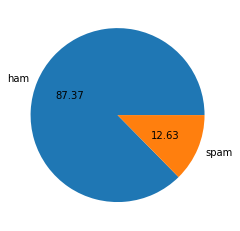

In [24]:
# representing in pie chart by matplotlib
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'], autopct = '%0.2f')
plt.show()

In [25]:
# Data is imbalanced

In [26]:
# Now we will perform the analysis like in Text how many alphabets, words, sentences are using
# For deeper analysis we are making 3 more columns
# 1.col= number of character in the sms
# 2.col= number of words in the sms
# 3.col= number of sentences in the sms 
# by using "nltk library" Natural language toolkit
# some dependency are their for nltk can be download by download code

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\JAINARAYAN
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
# how to count number of characters and making its column
df['Text'].apply(len)
df['num_characters'] = df['Text'].apply(len)
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# how to count number of words and making itys column by nltk Library
# 1. Using lambda funstion & nltk break sms into word by word
# 2. find the length of the string
df["Text"].apply(lambda x:nltk.word_tokenize(x))
df["Text"].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_words']= df["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
# how to count number of sentences and making itys column by nltk Library
# 1. Using lambda funstion & nltk break sms into sentences by sentences
# 2. find the length of the string
df["Text"].apply(lambda x:nltk.sent_tokenize(x))
df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))
df['num_sentences']= df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
# check what's going on by "describe function" like-mean, std, max, min
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
# now we can analyize ham and spam separately
# 1.ham sms
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
# 2. spam sms
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [35]:
# 1. In ham mean of characters , words , sentences are less
# 2. In spam mean of characters , words , sentences are more
# Conclusion = spam sms/emails are generally big

In [36]:
#  now we will see ham , spam in histogram by seaborn Library
import seaborn as sns 

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

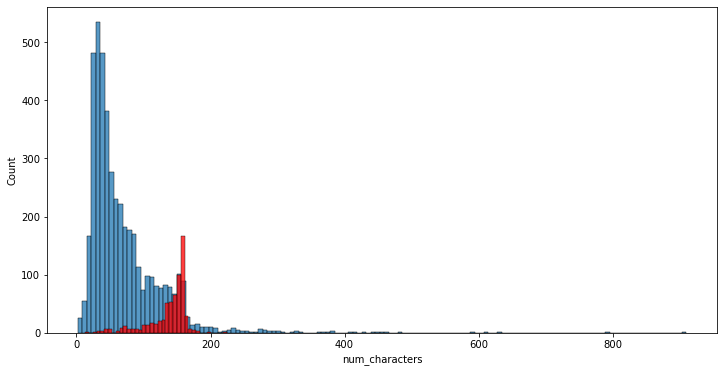

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["Target"] == 0]['num_characters'])
sns.histplot(df[df["Target"] == 1]['num_characters'], color = 'red')

In [38]:
# from above histogram we can conclude that most of the sms in ham made by less characters
# from above histogram we can conclude that most of the sms in spam made by more characters

<AxesSubplot:xlabel='num_words', ylabel='Count'>

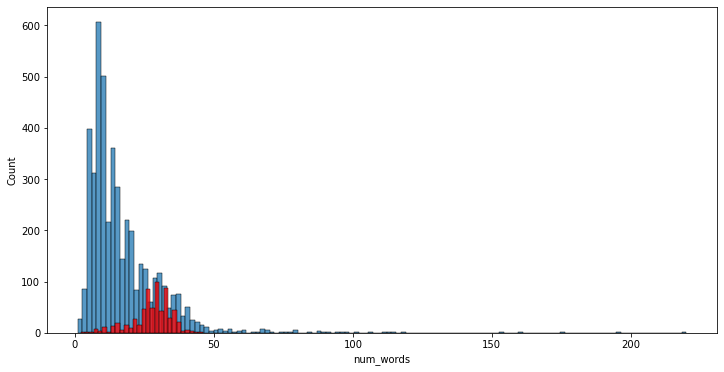

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["Target"] == 0]['num_words'])
sns.histplot(df[df["Target"] == 1]['num_words'], color = 'red')

In [40]:
# Same as in the case of words
# But thee are some outliers like there are 600,800 characters are also there in ham
# some 150-200 characters are also there in spam 

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

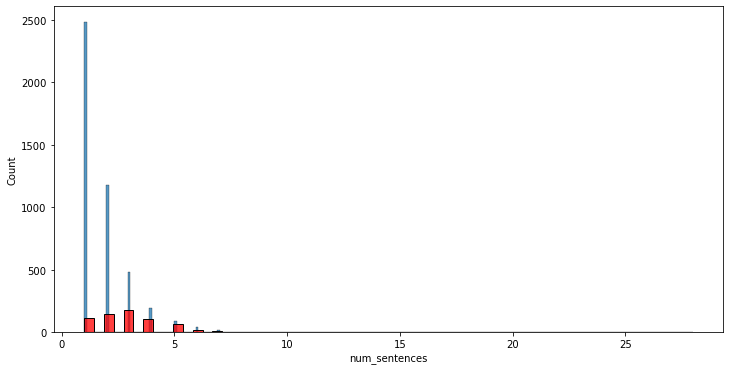

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["Target"] == 0]['num_sentences'])
sns.histplot(df[df["Target"] == 1]['num_sentences'], color = 'red')

In [42]:
# There are not much difference in sentences in ham and spam 
# All having almost same number of sentences

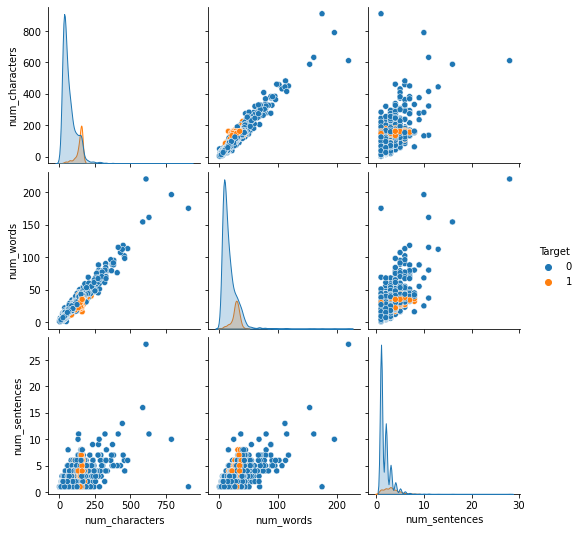

In [43]:
# now we will se the relations between num_characters,num_words, num_sentences
sns.pairplot(df , hue = "Target")

In [44]:
# roughly linear relations, outliers are there in our data that may interupt 

In [45]:
# finding Correlation
df.corr()

,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

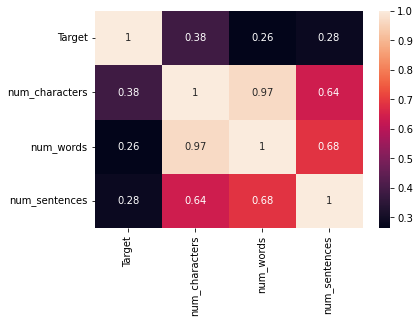

In [46]:
# Correlation using heatmap
sns.heatmap(df.corr(), annot=True)

In [47]:
# here for building a model we will take only on col i.e num_character because it variationh with target is 0.38.
# we are not using all cols. because there is strong corrlation betwwen them 0.64,0.68,0.97.

In [48]:
# now we will see the what are the top words in ham/spam

## Data Preprocessing / Text  Preprocessing
- Lower Case
- Tokenization
* Removing special characters 
* Removing stop words and punctuation
- Stemming

In [49]:
# stop words are those words which having meaning in sentences only but in actual they don't having meaning
# stop words like - is ,the, of etc also puntuation also don't have meaning
# stemming/lamitization - In stemming we will convert same type of words like dance, dancing == dance into same formatt

In [50]:
# now we are making a function which will perform all the data preprocessing simultaneously
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y =  []
    for i in text:
        if i.isalnum():
            y.append(i)
   
    # cloning/copying of list y[:]
    
    text = y[:]
    y.clear()
     
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

    return ' '.join(y)        ## string.join(list)  to join list elements by string seprator!   

In [51]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\JAINARAYAN
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [52]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [54]:
transform_text('Hi How are You%% apha345 20@')
transform_text('I am liking this Machine Learning presentation')

'like machin learn present'

In [55]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [56]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [57]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [58]:
# now we will make new column for the transform function
# we will not remove the old Text col for safe side
df["transformed_text"] = df['Text'].apply(transform_text)

In [59]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
# now we will make the WORD CLOUD which will show important words in bigger size

In [61]:
# 1. we will generate word cloud of "spam" messages
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size=10, background_color='white')

In [62]:
spam_wc = wc.generate(df[df['Target'] ==1] ['transformed_text'].str.cat(sep =" "))

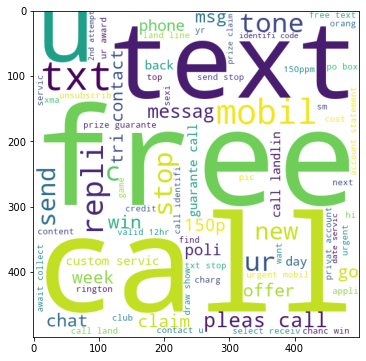

In [63]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [64]:
# 2. we will generate word cloud of "ham" messages
ham_wc = wc.generate(df[df['Target'] ==0] ['transformed_text'].str.cat(sep =" "))

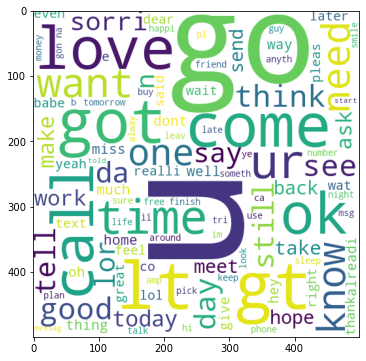

In [65]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [66]:
# now we will see the top 30 words used in ham/spam

In [67]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [68]:
# 1.spam top 30 words
spam_corpus = []
for msg in df[df["Target"] ==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [69]:
len (spam_corpus)

9939

In [70]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [71]:
# we will add top 30 words of spam in dataframe using pandas
pd.DataFrame(Counter(spam_corpus).most_common(30)).head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


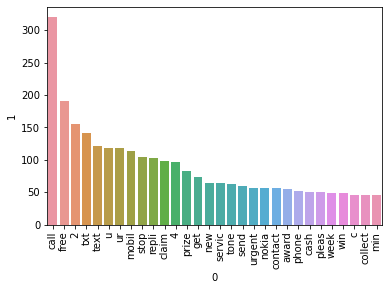

In [72]:
# we will plot those 30 words on bar plot using seaborn
# sns.barplot(col.1 , col.2)
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [73]:
# ----We are doing these analysis, generally when we are developing a model in a company, so we have to interpret like what are model is actually doing,
# ----We have to present to seniors that what this model is actually doing
# ----So we can understand all these things when we already understand these things, we have to have this idea
# ----Like we are making "Spam_Classifier" , we have to know what are the top 30 words so that we can interpret the results that will come more logically!
# ----These steps are actually optional we can build spam_classifier without these
# ----But in ML interpretation is very important, your model is how much interpretable is depend also upon the engineer who is making that model how much he/she understand the scenerio!
# ----So we perform "EDA" to more understanding of data and to imrove the interpretability of our model 

In [74]:
# 2.ham top 30 words
ham_corpus = []
for msg in df[df["Target"] ==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [75]:
len (ham_corpus)

35394

In [76]:
# we will add top 30 words of spam in dataframe using pandas
pd.DataFrame(Counter(ham_corpus).most_common(30)).head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


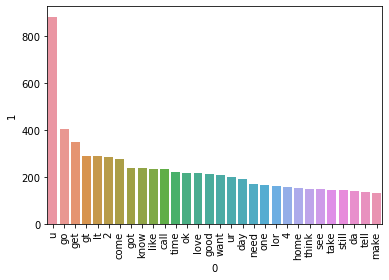

In [77]:
# we will plot those 30 words on bar plot using seaborn
# sns.barplot(col.1 , col.2)
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0] , pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [78]:
# now we finished "EDA performing"
# now we will build the model, model we will build based on ""Naive"" , As Naive will perform very well on Textual data
# we will start with Naive but we will perform more algorithm simultaneously, compare side by side which are giving best result
# At the end we will perform ""Ensemble learning"" also to check that we can improve it or not!

## 4. Model Building

In [79]:
df.head(2)

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [80]:
# as our all inputs are text and generally all ML algo workes on numerics data so we will convert that
# so we have to convert text into vectors by --
# 1. Bag of words --count the frequent words and convert into vectors "countVectorizer"
# 2. "TfidfVectorizer"

In [81]:
# 1.Converting input into vectors
# 2.Performing Naive
# 3.Finding Accuracy

In [82]:
# 1. making & analysis our model by bag of words or "countVectorizer"

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [83]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [84]:
x.shape

(5169, 3000)

In [88]:
y = df['Target'].values

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [91]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [92]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [93]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [94]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [95]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [96]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [85]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

NameError: name 'clfs' is not defined

## 5. Model Improvements